In [1]:
import jax
import basix
import numpy as np
from typing import Iterable, Union
from basix import CellType, ElementFamily, LagrangeVariant
import jax.numpy as jnp
import jax_pn
from jax.experimental import sparse
from jax_pn.ADPN import NSettings
from jax_pn.FEM1D import compute_local_matrices
%load_ext autoreload
%autoreload 2

In [2]:
jax.devices()
from jax import config

In [6]:
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 3
elements_per_cm = 10
regions = [
    (2.0, [20.0], np.array([[[0.0]]]), [20.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [0.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]
dpn_prob = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
n_groups = 1

mass_matrix, streaming_matrix = compute_local_matrices(lagrange)

settings = NSettings(n_groups, N_max + 1, dpn_prob.n_global_dofs, len(dpn_prob.nodes) - 1, dpn_prob.dof_matrix, dpn_prob.dof_matrix.shape[1], mass_matrix, streaming_matrix, dpn_prob.nodes)

adpn = jax_pn.ADPN.ADPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)


A, b= adpn.assemble_multigroup_system(bc="vacuum", n_energy_groups=1)


4 4 4


In [4]:
ujax = spsolve(A,b)

NameError: name 'spsolve' is not defined

NameError: name 'apn' is not defined

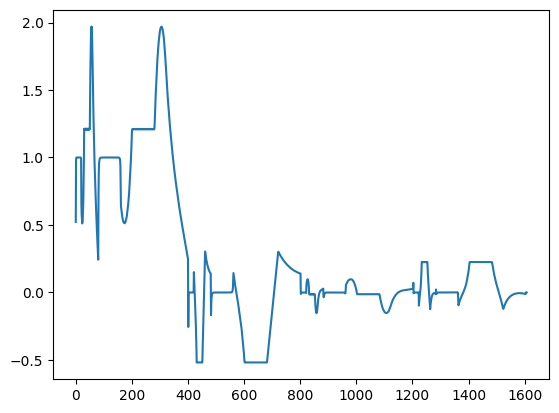

In [ ]:
#ujax = spsolve(ajax, bjax)
plt.plot(ujax)

upn = spsolve(apn, bpn)
plt.plot(upn)
print(ujax, upn)


In [ ]:
left_dof = 0
# right_dof = len(dpn_prob.nodes) - 1

# def check_marshak(settings, u, left_dof, right_dof):
#     left_coeff_matrix  = jax_pn.PN.legendre_coeff_matrix(settings.n_moments, 0, 1)
#     right_coeff_matrix = jax_pn.PN.legendre_coeff_matrix(settings.n_moments, -1, 0)

#     for enforce_i in range(1, settings.n_moments, 2): # number of boundary conditions = group * len(range(1, settings.n_moments, 2))            
#         enforce_total = 0
#         for l in range(settings.n_moments):              
#             left_idx = global_index_PN(settings.n_moments, settings.n_global_dofs, 0, l, right_dof)  # group is fixed to 0 for now
#             enforce_total += u[left_idx] * right_coeff_matrix[enforce_i, l] * (2 * l + 1)

            
#         print(enforce_i, enforce_total)

# check_marshak(settings, ujax, left_dof, right_dof)
# check_marshak(settings, upn, left_dof, right_dof)

0.14285714285714285
[[-1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.66533454e-16
  -1.66533454e-16 -1.66533454e-16 -1.66533454e-16 -1.665